<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from __future__ import print_function
from IPython.display import display, HTML

import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
from random import random

from matplotlib import pyplot as plt
import matplotlib.ticker as tk
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context("paper")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

In [2]:
def random_powerlaw(x_min, alpha): #https://arxiv.org/pdf/0706.1062.pdf
    r = random()
    return x_min * (1 - r) ** (-1 / (alpha - 1))
def mm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple((i/10)/inch for i in tupl[0])
    else:
        return tuple((i/10)/inch for i in tupl)

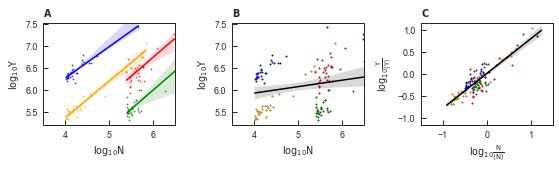

In [3]:
F_exp=5/6

urb_net_1_N=np.zeros(30)
urb_net_1_F=np.zeros(30)
urb_net_1_F0=110
for i in range(0, 30):
    urb_net_1_N[i]=random_powerlaw(x_min=10000, alpha=2)
    urb_net_1_F[i]=(urb_net_1_F0*(urb_net_1_N[i]**(F_exp+(np.random.randn()/30))))+(np.random.randn()*10)
    
urb_net_2_N=np.zeros(30)
urb_net_2_F=np.zeros(30)
urb_net_2_F0=768
for i in range(0, 30):
    urb_net_2_N[i]=random_powerlaw(x_min=10000, alpha=2.5)
    urb_net_2_F[i]=urb_net_2_F0*(urb_net_2_N[i]**(F_exp+(np.random.randn()/30)))+(np.random.randn()*10)
    
urb_net_3_N=np.zeros(30)
urb_net_3_F=np.zeros(30)
urb_net_3_F0=50
for i in range(0, 30):
    urb_net_3_N[i]=random_powerlaw(x_min=250000, alpha=3)
    urb_net_3_F[i]=urb_net_3_F0*(urb_net_3_N[i]**(F_exp+(np.random.randn()/30)))+(np.random.randn()*10)
    
urb_net_4_N=np.zeros(30)
urb_net_4_F=np.zeros(30)
urb_net_4_F0=10
for i in range(0, 30):
    urb_net_4_N[i]=random_powerlaw(x_min=250000, alpha=3)
    urb_net_4_F[i]=urb_net_4_F0*(urb_net_4_N[i]**(F_exp+(np.random.randn()/30)))+(np.random.randn()*10)
    
urb_net_N=np.append(urb_net_1_N, [urb_net_2_N, urb_net_3_N, urb_net_4_N])
urb_net_F=np.append(urb_net_1_F, [urb_net_2_F, urb_net_3_F, urb_net_4_F])
dx=d=np.floor(np.max(np.log10(urb_net_N)))-np.floor(np.min(np.log10(urb_net_N)))
dy=np.max(np.log10(urb_net_F))-np.min(np.log10(urb_net_F))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=mm2inch(200, 70))
ax1=sns.regplot(x=np.log10(urb_net_1_N), y=np.log10(urb_net_1_F), truncate=True, ax=ax1, scatter_kws={'s':3}, color='orange', line_kws={'lw':1.5})
ax1=sns.regplot(x=np.log10(urb_net_2_N), y=np.log10(urb_net_2_F), truncate=True, ax=ax1, scatter_kws={'s':3}, color='blue', line_kws={'lw':1.5})
ax1=sns.regplot(x=np.log10(urb_net_3_N), y=np.log10(urb_net_3_F), truncate=True, ax=ax1, scatter_kws={'s':3}, color='red', line_kws={'lw':1.5})
ax1=sns.regplot(x=np.log10(urb_net_4_N), y=np.log10(urb_net_4_F), truncate=True, ax=ax1, scatter_kws={'s':3}, color='green', line_kws={'lw':1.5})
ax1.set_aspect('equal')
ax1.set_xlim([np.floor(np.min(np.log10(urb_net_N)))-0.5,np.floor(np.max(np.log10(urb_net_N)))+0.5])
ax1.set_ylim([(np.min(np.log10(urb_net_F)))-0.1,(np.max(np.log10(urb_net_F)))+0.1])
ax1.set_xlabel(r'$\sf{{\log_{10}}{N}}$')
ax1.set_ylabel(r'$\sf{{\log_{10}}{Y}}$')

ax2=sns.regplot(x=np.log10(urb_net_N), y=np.log10(urb_net_F), color='k', truncate=True, ax=ax2, scatter_kws={'s':3}, line_kws={'lw':1.5})
ax2=sns.regplot(x=np.log10(urb_net_1_N), y=np.log10(urb_net_1_F), fit_reg=False, ax=ax2, scatter_kws={'s':3}, color='orange')
ax2=sns.regplot(x=np.log10(urb_net_2_N), y=np.log10(urb_net_2_F), fit_reg=False, ax=ax2, scatter_kws={'s':3}, color='blue')
ax2=sns.regplot(x=np.log10(urb_net_3_N), y=np.log10(urb_net_3_F), fit_reg=False, ax=ax2, scatter_kws={'s':3}, color='red')
ax2=sns.regplot(x=np.log10(urb_net_4_N), y=np.log10(urb_net_4_F), fit_reg=False, ax=ax2, scatter_kws={'s':3}, color='green')
ax2.set_aspect('equal')
ax2.set_xlim([np.floor(np.min(np.log10(urb_net_N)))-0.5,np.floor(np.max(np.log10(urb_net_N)))+0.5])
ax2.set_ylim([(np.min(np.log10(urb_net_F)))-0.1,(np.max(np.log10(urb_net_F)))+0.1])
ax2.set_xlabel(r'$\sf{{\log_{10}}{N}}$')
ax2.set_ylabel(r'$\sf{{\log_{10}}{Y}}$')

urb_net_comp_N=np.append(urb_net_1_N/np.mean(urb_net_1_N), 
                         [urb_net_2_N/np.mean(urb_net_2_N),
                          urb_net_3_N/np.mean(urb_net_3_N),
                          urb_net_4_N/np.mean(urb_net_4_N)])
urb_net_comp_F=np.append(urb_net_1_F/np.mean(urb_net_1_F), 
                         [urb_net_2_F/np.mean(urb_net_2_F), 
                          urb_net_3_F/np.mean(urb_net_3_F),
                          urb_net_4_F/np.mean(urb_net_4_F)])
ax3=sns.regplot(x=np.log10(urb_net_comp_N), y=np.log10(urb_net_comp_F), color='k', ax=ax3, scatter_kws={'s':3}, line_kws={'lw':1.5})
ax3=sns.regplot(x=np.log10(urb_net_1_N/np.mean(urb_net_1_N)), y=np.log10(urb_net_1_F/np.mean(urb_net_1_F)), color='orange', fit_reg=False, ax=ax3, scatter_kws={'s':3})
ax3=sns.regplot(x=np.log10(urb_net_2_N/np.mean(urb_net_2_N)), y=np.log10(urb_net_2_F/np.mean(urb_net_2_F)), color='blue', fit_reg=False, ax=ax3, scatter_kws={'s':3})
ax3=sns.regplot(x=np.log10(urb_net_3_N/np.mean(urb_net_3_N)), y=np.log10(urb_net_3_F/np.mean(urb_net_3_F)), color='red', fit_reg=False, ax=ax3, scatter_kws={'s':3})
ax3=sns.regplot(x=np.log10(urb_net_4_N/np.mean(urb_net_4_N)), y=np.log10(urb_net_4_F/np.mean(urb_net_4_F)), color='green', fit_reg=False, ax=ax3, scatter_kws={'s':3})

ax3.set_aspect('equal')
ax3.set_xlabel(r'$\sf{{\log_{10}}{\frac{N}{\langle N \rangle}}}$')
ax3.set_ylabel(r'$\sf{{\log_{10}}{\frac{Y}{\langle Y \rangle}}}$')
ax3.set_xlim([-1.5,1.5])
ax3.set_ylim([-dy/2-.1,dy/2+.1])

ax1.set_title(r'$\bf{A}$', loc='left', y=1.0)
ax2.set_title(r'$\bf{B}$', loc='left', y=1.0)
ax3.set_title(r'$\bf{C}$', loc='left', y=1.0)

plt.tight_layout()
plt.savefig('Data\F1.pdf')

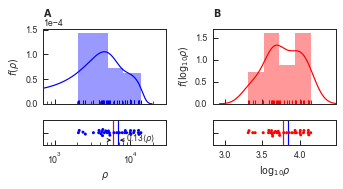

In [7]:
lon_boro_net=pd.read_csv('Data/LONDONEW.csv', sep=';', header='infer')

fig = plt.figure(figsize=mm2inch(200/1.618, 70))
gs = gridspec.GridSpec(2, 2, height_ratios=[3,1], width_ratios=[1,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

sns.distplot(lon_boro_net.r, ax=ax1, hist_kws=None, rug=True, color='b')
sns.distplot(np.log10(lon_boro_net.r), ax=ax2, color='red', rug=True)

ax3.axvline(np.mean((lon_boro_net.r)), color='b')
ax4.axvline((np.mean(np.log10(lon_boro_net.r))), color='red')
ax3.axvline(10**(np.mean(np.log10(lon_boro_net.r))), color='red')
ax4.axvline(np.log10(np.mean((lon_boro_net.r))), color='b')

sns.swarmplot(lon_boro_net.r, ax=ax3, color='b', size=3)
sns.swarmplot(np.log10(lon_boro_net.r), ax=ax4, color='r', size=3)

xfmt = tk.ScalarFormatter()
xfmt.set_powerlimits((-3,3))

ax1.set_xscale('log')
ax1.set_xlim([700,30000])
ax3.set_xscale('log')
ax3.set_xlim([700,30000])

ax2.set_xlim(np.log10([700,30000]))
ax4.set_xlim(np.log10([700,30000]))

ax1.set_ylabel(r'$f(\rho)$')
ax1.set_xlabel(r'')
ax1.set_xticklabels([])
ax3.set_xlabel(r'$\rho$')

ax1.yaxis.set_major_formatter(xfmt)
ax2.set_ylabel(r'$f({\log_{10}}\rho)$')
ax2.set_xlabel(r'')
ax2.set_xticklabels([])
ax4.set_xlabel(r'${\log_{10}}\rho$')

ax1.set_title(r'$\bf{A}$', loc='left', y=1.08)
ax2.set_title(r'$\bf{B}$', loc='left', y=1.08)

nm=np.mean((lon_boro_net.r))
lnnm=10**(np.mean(np.log10(lon_boro_net.r)))

ax3.annotate(str(np.round((nm-lnnm)/nm,2))+r'$\langle\rho\rangle$', 
             (1.3*np.mean((lon_boro_net.r)), 0.35), **{'fontsize':'small'})
ax3.annotate("",
            xy=(10**(np.mean(np.log10(lon_boro_net.r))), 0.3), xycoords='data',
            xytext=(0.8*10**(np.mean(np.log10(lon_boro_net.r))), 0.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), **{'fontsize':'small'}
            )

ax3.annotate('',
            xy=((np.mean((lon_boro_net.r))), 0.3), xycoords='data', 
            xytext=(1.3*np.mean((lon_boro_net.r)), 0.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), **{'fontsize':'small'}
        )

fig.tight_layout()
plt.savefig('Data\F2.pdf')